For k=3, Average Accuracy: 0.8280680104209516
Number of correctly classified 2023 locations: 35
Number of mis-classified 2023 locations: 9
Fraction of correctly classified 2023 locations: 0.80

For k=5, Average Accuracy: 0.8326546003016592
Number of correctly classified 2023 locations: 37
Number of mis-classified 2023 locations: 7
Fraction of correctly classified 2023 locations: 0.84

For k=7, Average Accuracy: 0.8281091457562045
Number of correctly classified 2023 locations: 36
Number of mis-classified 2023 locations: 8
Fraction of correctly classified 2023 locations: 0.82

For k=9, Average Accuracy: 0.8281091457562045
Number of correctly classified 2023 locations: 36
Number of mis-classified 2023 locations: 8
Fraction of correctly classified 2023 locations: 0.82

For k=11, Average Accuracy: 0.8281091457562045
Number of correctly classified 2023 locations: 36
Number of mis-classified 2023 locations: 8
Fraction of correctly classified 2023 locations: 0.82

Best k value: 5


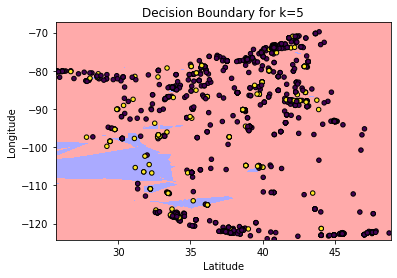

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Load dataset from Excel file
dataset_path = "us-violence-brief-1.xls" 
df = pd.read_excel(dataset_path)

# Separate features and target variable
X = df[['year', 'month', 'day', 'latitude', 'longitude']].values
y = df['fatalities'].values

# Define hyperparameters to tune
k_values = [3, 5, 7, 9, 11]
num_folds = 5

# Initialize lists to store average accuracies for each k
avg_accuracies = []

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for k in k_values:
    fold_accuracies = []
    for train_index, val_index in kf.split(X):
        # Split data into training and validation sets
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Filter training data for years 2020-2022
        X_train_2020_2022 = X_train[(X_train[:, 0] >= 2020) & (X_train[:, 0] <= 2022)]
        y_train_2020_2022 = y_train[(X_train[:, 0] >= 2020) & (X_train[:, 0] <= 2022)]

        # Filter validation data for year 2023
        X_val_2023 = X_val[X_val[:, 0] == 2023]
        y_val_2023 = y_val[X_val[:, 0] == 2023]

        # Create KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)

        # Train the classifier on the training data (2020-2022)
        knn.fit(X_train_2020_2022, y_train_2020_2022)

        # Predict on the validation set (2023)
        y_pred = knn.predict(X_val_2023)

        # Calculate accuracy
        accuracy = accuracy_score(y_val_2023, y_pred)
        fold_accuracies.append(accuracy)
    
    # Calculate average accuracy for this k
    avg_accuracy = np.mean(fold_accuracies)
    avg_accuracies.append(avg_accuracy)
    
#     print(f"For k={k}, Average Accuracy: {avg_accuracy}")
    
    # Find the number of correctly classified and mis-classified locations
    correctly_classified = int(np.sum(y_pred == y_val_2023))
    mis_classified = len(y_val_2023) - correctly_classified

    # Calculate the fraction of correctly classified locations
    fraction_correct = correctly_classified / len(y_val_2023)

    # Print results
    print(f"For k={k}, Average Accuracy: {avg_accuracy}")
    print(f"Number of correctly classified 2023 locations: {correctly_classified}")
    print(f"Number of mis-classified 2023 locations: {mis_classified}")
    print(f"Fraction of correctly classified 2023 locations: {fraction_correct:.2f}")
    print()

# Find the best k value
best_k = k_values[np.argmax(avg_accuracies)]
print(f"Best k value: {best_k}")


# Plot decision boundary for the best k
# Create a mesh grid covering the range of latitude and longitude values
latitude_min, latitude_max = df['latitude'].min() - 0.1, df['latitude'].max() + 0.1
longitude_min, longitude_max = df['longitude'].min() - 0.1, df['longitude'].max() + 0.1
h = 0.01  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(latitude_min, latitude_max, h), np.arange(longitude_min, longitude_max, h))

# Define the colormap for the decision regions
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colors for decision regions

# Create KNN classifier with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the classifier on the entire training data (2020-2022)
X_train_2020_2022 = X[(X[:, 0] >= 2020) & (X[:, 0] <= 2022)]
y_train_2020_2022 = y[(X[:, 0] >= 2020) & (X[:, 0] <= 2022)]
best_knn.fit(X_train_2020_2022[:, 3:], y_train_2020_2022)

# Predict class labels for each point in the mesh grid
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train_2020_2022[:, 3], X_train_2020_2022[:, 4], c=y_train_2020_2022, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Decision Boundary for k={best_k}")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Load dataset from Excel file
dataset_path = "us-violence-brief-1.xls"
df = pd.read_excel(dataset_path)

# Separate features and target variable
X = df[['year', 'month', 'day', 'latitude', 'longitude']].values
y = df['fatalities'].values

# Define hyperparameters to tune
k_values = [3, 5, 7, 9, 11]

# Initialize lists to store average accuracies for each k
avg_accuracies = []

for k in k_values:
    # Filter training data for years 2020-2022
    X_train_2020_2022 = X[(X[:, 0] >= 2020) & (X[:, 0] <= 2022)]
    y_train_2020_2022 = y[(X[:, 0] >= 2020) & (X[:, 0] <= 2022)]

    # Filter validation data for year 2023
    X_val_2023 = X[X[:, 0] == 2023]
    y_val_2023 = y[X[:, 0] == 2023]

    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data (2020-2022)
    knn.fit(X_train_2020_2022[:, 3:], y_train_2020_2022)

    # Predict on the validation set (2023)
    y_pred = knn.predict(X_val_2023[:, 3:])

    # Calculate accuracy
    accuracy = accuracy_score(y_val_2023, y_pred)
    avg_accuracies.append(accuracy)

    # Find the number of correctly classified and mis-classified locations
    correctly_classified = int(np.sum(y_pred == y_val_2023))
    mis_classified = len(y_val_2023) - correctly_classified

    # Calculate the fraction of correctly classified locations
    fraction_correct = correctly_classified / len(y_val_2023)

    # Print results
    print(f"For k={k}, Accuracy: {accuracy}")
    print(f"Number of correctly classified 2023 locations: {correctly_classified}")
    print(f"Number of mis-classified 2023 locations: {mis_classified}")
    print(f"Fraction of correctly classified 2023 locations: {fraction_correct:.2f}")
    print()

# Find the best k value
best_k = k_values[np.argmax(avg_accuracies)]
print(f"Best k value: {best_k}")

# # Plot decision boundary for the best k
# # Create a mesh grid covering the range of latitude and longitude values
# latitude_min, latitude_max = df['latitude'].min() - 0.1, df['latitude'].max() + 0.1
# longitude_min, longitude_max = df['longitude'].min() - 0.1, df['longitude'].max() + 0.1
# h = 0.01  # Step size in the mesh
# xx, yy = np.meshgrid(np.arange(latitude_min, latitude_max, h), np.arange(longitude_min, longitude_max, h))

# # Define the colormap for the decision regions
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colors for decision regions

# # Create KNN classifier with the best k value
# best_knn = KNeighborsClassifier(n_neighbors=best_k)

# # Train the classifier on the entire training data (2020-2022)
# X_train_2020_2022 = X[(X[:, 0] >= 2020) & (X[:, 0] <= 2022)]
# y_train_2020_2022 = y[(X[:, 0] >= 2020) & (X[:, 0] <= 2022)]
# best_knn.fit(X_train_2020_2022[:, 3:], y_train_2020_2022)

# # Predict class labels for each point in the mesh grid
# Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure()
# plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# # Plot the training points
# plt.scatter(X_train_2020_2022[:, 3], X_train_2020_2022[:, 4], c=y_train_2020_2022, edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.title(f"Decision Boundary for k={best_k}")
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.show()


For k=3, Accuracy: 0.8387096774193549
Number of correctly classified 2023 locations: 182
Number of mis-classified 2023 locations: 35
Fraction of correctly classified 2023 locations: 0.84

For k=5, Accuracy: 0.8387096774193549
Number of correctly classified 2023 locations: 182
Number of mis-classified 2023 locations: 35
Fraction of correctly classified 2023 locations: 0.84

For k=7, Accuracy: 0.8341013824884793
Number of correctly classified 2023 locations: 181
Number of mis-classified 2023 locations: 36
Fraction of correctly classified 2023 locations: 0.83

For k=9, Accuracy: 0.8341013824884793
Number of correctly classified 2023 locations: 181
Number of mis-classified 2023 locations: 36
Fraction of correctly classified 2023 locations: 0.83

For k=11, Accuracy: 0.8341013824884793
Number of correctly classified 2023 locations: 181
Number of mis-classified 2023 locations: 36
Fraction of correctly classified 2023 locations: 0.83

Best k value: 3


For k=3, Average Accuracy: 0.8280680104209516
Number of correctly classified 2023 locations: 35
Number of mis-classified 2023 locations: 9
Fraction of correctly classified 2023 locations: 0.80

For k=5, Average Accuracy: 0.8326546003016592
Number of correctly classified 2023 locations: 37
Number of mis-classified 2023 locations: 7
Fraction of correctly classified 2023 locations: 0.84

For k=7, Average Accuracy: 0.8281091457562045
Number of correctly classified 2023 locations: 36
Number of mis-classified 2023 locations: 8
Fraction of correctly classified 2023 locations: 0.82

For k=9, Average Accuracy: 0.8281091457562045
Number of correctly classified 2023 locations: 36
Number of mis-classified 2023 locations: 8
Fraction of correctly classified 2023 locations: 0.82

For k=11, Average Accuracy: 0.8281091457562045
Number of correctly classified 2023 locations: 36
Number of mis-classified 2023 locations: 8
Fraction of correctly classified 2023 locations: 0.82

Best k value: 5


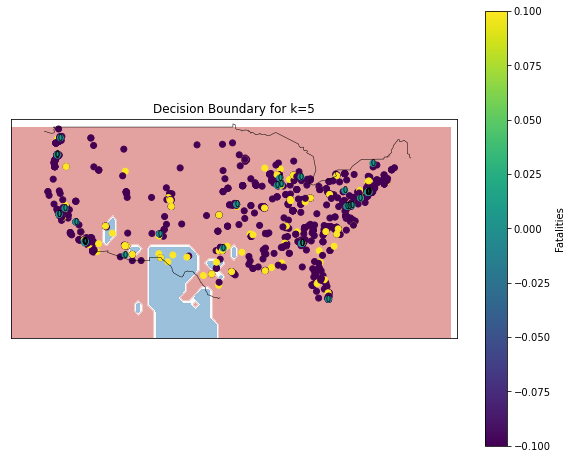

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from mpl_toolkits.basemap import Basemap
# Load dataset from Excel file
dataset_path = "us-violence-brief-1.xls" 
df = pd.read_excel(dataset_path)

# Separate features and target variable
X = df[['year', 'month', 'day', 'latitude', 'longitude']].values
y = df['fatalities'].values

# Define hyperparameters to tune
k_values = [3, 5, 7, 9, 11]
num_folds = 5

# Initialize lists to store average accuracies for each k
avg_accuracies = []

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for k in k_values:
    fold_accuracies = []
    for train_index, val_index in kf.split(X):
        # Split data into training and validation sets
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Filter training data for years 2020-2022
        X_train_2020_2022 = X_train[(X_train[:, 0] >= 2020) & (X_train[:, 0] <= 2022)]
        y_train_2020_2022 = y_train[(X_train[:, 0] >= 2020) & (X_train[:, 0] <= 2022)]

        # Filter validation data for year 2023
        X_val_2023 = X_val[X_val[:, 0] == 2023]
        y_val_2023 = y_val[X_val[:, 0] == 2023]

        # Create KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)

        # Train the classifier on the training data (2020-2022)
        knn.fit(X_train_2020_2022, y_train_2020_2022)

        # Predict on the validation set (2023)
        y_pred = knn.predict(X_val_2023)

        # Calculate accuracy
        accuracy = accuracy_score(y_val_2023, y_pred)
        fold_accuracies.append(accuracy)
    
    # Calculate average accuracy for this k
    avg_accuracy = np.mean(fold_accuracies)
    avg_accuracies.append(avg_accuracy)
    
#     print(f"For k={k}, Average Accuracy: {avg_accuracy}")
    
    # Find the number of correctly classified and mis-classified locations
    correctly_classified = int(np.sum(y_pred == y_val_2023))
    mis_classified = len(y_val_2023) - correctly_classified

    # Calculate the fraction of correctly classified locations
    fraction_correct = correctly_classified / len(y_val_2023)

    # Print results
    print(f"For k={k}, Average Accuracy: {avg_accuracy}")
    print(f"Number of correctly classified 2023 locations: {correctly_classified}")
    print(f"Number of mis-classified 2023 locations: {mis_classified}")
    print(f"Fraction of correctly classified 2023 locations: {fraction_correct:.2f}")
    print()

# Find the best k value
best_k = k_values[np.argmax(avg_accuracies)]
print(f"Best k value: {best_k}")

# Create KNN classifier with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the classifier on the entire training data (2020-2022)
X_train_2020_2022 = X[(X[:, 0] >= 2020) & (X[:, 0] <= 2022)]
y_train_2020_2022 = y[(X[:, 0] >= 2020) & (X[:, 0] <= 2022)]
best_knn.fit(X_train_2020_2022[:, 3:], y_train_2020_2022)

# Plot decision boundary on a geographical map of the United States
plt.figure(figsize=(10, 8))

# Create a Basemap instance centered around the United States
m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-130,urcrnrlon=-60,resolution='l')

# Draw country boundaries
m.drawcountries()

# Define the mesh grid
lons, lats = np.meshgrid(np.arange(-130, -60, 1), np.arange(20, 50, 1))

# Convert meshgrid to Basemap coordinates
x, y = m(lons, lats)

# Predict class labels for each point in the mesh grid
Z = best_knn.predict(np.c_[lats.ravel(), lons.ravel()])

# Reshape Z to match the shape of the meshgrid
Z = Z.reshape(lats.shape)

# Plot the decision boundary
m.contourf(x, y, Z, levels=2, cmap='RdBu', alpha=0.5)

# Plot the training data points
m.scatter(X_train_2020_2022[:, 4], X_train_2020_2022[:, 3], latlon=True, c=y_train_2020_2022, cmap='viridis')

# Predict on the validation set (2023)
y_pred_2023 = best_knn.predict(X_val_2023[:, 3:])

# Plot the 2023 data points with predicted labels
for label, lat, lon in zip(y_pred_2023, X_val_2023[:, 3], X_val_2023[:, 4]):
    x, y = m(lon, lat)
    plt.text(x, y, str(label), fontsize=8, color='black', ha='center', va='center')

# Plot the 2023 data points
m.scatter(X_val_2023[:, 4], X_val_2023[:, 3], latlon=True, c=y_pred_2023, cmap='viridis')

plt.title(f"Decision Boundary for k={best_k}")
plt.colorbar(label='Fatalities')
plt.show()

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from mpl_toolkits.basemap import Basemap


# Load dataset from Excel file
dataset_path = "us-violence-brief-1.xls" 
df = pd.read_excel(dataset_path)

# Separate features and target variable
X = df[['year', 'month', 'day', 'latitude', 'longitude']].values
y = df['fatalities'].values

# Define hyperparameters to tune
k_values = [3, 5, 7, 9, 11]
num_folds = 5

# Initialize lists to store average accuracies for each k
avg_accuracies = []

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for k in k_values:
    fold_accuracies = []
    for train_index, val_index in kf.split(X):
        # Split data into training and validation sets
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Filter training data for years 2020-2022
        X_train_2020_2022 = X_train[(X_train[:, 0] >= 2020) & (X_train[:, 0] <= 2022)]
        y_train_2020_2022 = y_train[(X_train[:, 0] >= 2020) & (X_train[:, 0] <= 2022)]

        # Filter validation data for year 2023
        X_val_2023 = X_val[X_val[:, 0] == 2023]
        y_val_2023 = y_val[X_val[:, 0] == 2023]

        # Create KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)

        # Train the classifier on the training data (2020-2022)
        knn.fit(X_train_2020_2022, y_train_2020_2022)

        # Predict on the validation set (2023)
        y_pred = knn.predict(X_val_2023)

        # Calculate accuracy
        accuracy = accuracy_score(y_val_2023, y_pred)
        fold_accuracies.append(accuracy)
    
    # Calculate average accuracy for this k
    avg_accuracy = np.mean(fold_accuracies)
    avg_accuracies.append(avg_accuracy)
    
#     print(f"For k={k}, Average Accuracy: {avg_accuracy}")
    
    # Find the number of correctly classified and mis-classified locations
    correctly_classified = int(np.sum(y_pred == y_val_2023))
    mis_classified = len(y_val_2023) - correctly_classified

    # Calculate the fraction of correctly classified locations
    fraction_correct = correctly_classified / len(y_val_2023)

    # Print results
    print(f"For k={k}, Average Accuracy: {avg_accuracy}")
    print(f"Number of correctly classified 2023 locations: {correctly_classified}")
    print(f"Number of mis-classified 2023 locations: {mis_classified}")
    print(f"Fraction of correctly classified 2023 locations: {fraction_correct:.2f}")
    print()

# Find the best k value
best_k = k_values[np.argmax(avg_accuracies)]
print(f"Best k value: {best_k}")

# Create KNN classifier with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the classifier on the entire training data (2020-2022)
X_train_2020_2022 = X[(X[:, 0] >= 2020) & (X[:, 0] <= 2022)]
y_train_2020_2022 = y[(X[:, 0] >= 2020) & (X[:, 0] <= 2022)]
best_knn.fit(X_train_2020_2022[:, 3:], y_train_2020_2022)

# Predict on the validation set (2023)
y_pred_2023 = best_knn.predict(X_val_2023[:, 3:])

# Combine latitude and longitude for geocoding
lat_lon_2023 = X_val_2023[:, 3:5]

# Initialize a geocoder
geolocator = Nominatim(user_agent="violence_analysis")

# Get place names and locations for each location
places_with_info = []
for lat, lon in lat_lon_2023:
    location = geolocator.reverse((lat, lon), timeout=10)
    place_name = location.address if location else "Unknown"
    places_with_info.append((place_name, (lat, lon)))

# Combine place names with fatalities
places_with_fatalities = list(zip(places_with_info, y_pred_2023))

# Sort by fatalities
sorted_places = sorted(places_with_fatalities, key=lambda x: x[1], reverse=True)

# Print top 5 places by fatalities
print("Top 5 places by fatalities:")
for i, ((place, (lat, lon)), fatalities) in enumerate(sorted_places[:5], start=1):
    print(f"{i}. {lat}, {lon}: {fatalities}")

# Print least 5 places by fatalities
print("\nLeast 5 places by fatalities:")
for i, ((place, (lat, lon)), fatalities) in enumerate(sorted_places[-5:], start=1):
    print(f"{i}. {lat}, {lon}: {fatalities}")

# Create a Folium map centered around the United States
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Plot each location with its corresponding place name and fatalities
for ((place, (lat, lon)), fatalities) in sorted_places:
    folium.Marker((lat, lon), popup=f"Place: {place}\nLocation: ({lat}, {lon})\nFatalities: {fatalities}").add_to(m)

# Show the map
m


For k=3, Average Accuracy: 0.8280680104209516
Number of correctly classified 2023 locations: 35
Number of mis-classified 2023 locations: 9
Fraction of correctly classified 2023 locations: 0.80

For k=5, Average Accuracy: 0.8326546003016592
Number of correctly classified 2023 locations: 37
Number of mis-classified 2023 locations: 7
Fraction of correctly classified 2023 locations: 0.84

For k=7, Average Accuracy: 0.8281091457562045
Number of correctly classified 2023 locations: 36
Number of mis-classified 2023 locations: 8
Fraction of correctly classified 2023 locations: 0.82

For k=9, Average Accuracy: 0.8281091457562045
Number of correctly classified 2023 locations: 36
Number of mis-classified 2023 locations: 8
Fraction of correctly classified 2023 locations: 0.82

For k=11, Average Accuracy: 0.8281091457562045
Number of correctly classified 2023 locations: 36
Number of mis-classified 2023 locations: 8
Fraction of correctly classified 2023 locations: 0.82

Best k value: 5
Top 5 places 

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from mpl_toolkits.basemap import Basemap


# Load dataset from Excel file
dataset_path = "us-violence-brief-1.xls" 
df = pd.read_excel(dataset_path)

# Separate features and target variable
X = df[['year', 'month', 'day', 'latitude', 'longitude']].values
y = df['fatalities'].values

# Define hyperparameters to tune
k_values = [3, 5, 7, 9, 11]
num_folds = 5

# Initialize lists to store average accuracies for each k
avg_accuracies = []

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for k in k_values:
    fold_accuracies = []
    for train_index, val_index in kf.split(X):
        # Split data into training and validation sets
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Filter training data for years 2020-2022
        X_train_2020_2022 = X_train[(X_train[:, 0] >= 2020) & (X_train[:, 0] <= 2022)]
        y_train_2020_2022 = y_train[(X_train[:, 0] >= 2020) & (X_train[:, 0] <= 2022)]

        # Filter validation data for year 2023
        X_val_2023 = X_val[X_val[:, 0] == 2023]
        y_val_2023 = y_val[X_val[:, 0] == 2023]

        # Create KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)

        # Train the classifier on the training data (2020-2022)
        knn.fit(X_train_2020_2022, y_train_2020_2022)

        # Predict on the validation set (2023)
        y_pred = knn.predict(X_val_2023)

        # Calculate accuracy
        accuracy = accuracy_score(y_val_2023, y_pred)
        fold_accuracies.append(accuracy)
    
    # Calculate average accuracy for this k
    avg_accuracy = np.mean(fold_accuracies)
    avg_accuracies.append(avg_accuracy)
    
#     print(f"For k={k}, Average Accuracy: {avg_accuracy}")
    
    # Find the number of correctly classified and mis-classified locations
    correctly_classified = int(np.sum(y_pred == y_val_2023))
    mis_classified = len(y_val_2023) - correctly_classified

    # Calculate the fraction of correctly classified locations
    fraction_correct = correctly_classified / len(y_val_2023)

    # Print results
    print(f"For k={k}, Average Accuracy: {avg_accuracy}")
    print(f"Number of correctly classified 2023 locations: {correctly_classified}")
    print(f"Number of mis-classified 2023 locations: {mis_classified}")
    print(f"Fraction of correctly classified 2023 locations: {fraction_correct:.2f}")
    print()

# Find the best k value
best_k = k_values[np.argmax(avg_accuracies)]
print(f"Best k value: {best_k}")

# Create KNN classifier with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the classifier on the entire training data (2020-2022)
X_train_2020_2022 = X[(X[:, 0] >= 2020) & (X[:, 0] <= 2022)]
y_train_2020_2022 = y[(X[:, 0] >= 2020) & (X[:, 0] <= 2022)]
best_knn.fit(X_train_2020_2022[:, 3:], y_train_2020_2022)

# Predict on the validation set (2023)
y_pred_2023 = best_knn.predict(X_val_2023[:, 3:])

# Combine latitude and longitude for geocoding
lat_lon_2023 = X_val_2023[:, 3:5]

# Initialize a geocoder
geolocator = Nominatim(user_agent="violence_analysis")

# Get place names and locations for each location
places_with_info = []
for lat, lon in lat_lon_2023:
    location = geolocator.reverse((lat, lon), timeout=10)
    place_name = location.address if location else "Unknown"
    places_with_info.append((place_name, (lat, lon)))

# Combine place names with fatalities
places_with_fatalities = list(zip(places_with_info, y_val_2023))

# Calculate fatalities count for each location
place_fatality_count = {}
for (place, (lat, lon)), fatalities in places_with_fatalities:
    if place not in place_fatality_count:
        place_fatality_count[place] = 0
    place_fatality_count[place] += fatalities

# Sort by fatalities count
sorted_places = sorted(place_fatality_count.items(), key=lambda x: x[1], reverse=True)


# Print top 5 places by fatalities
print("Top 5 places by fatalities:")
for i, (place, fatalities) in enumerate(sorted_places[:5], 1):
    print(f"{i}. {place}: {fatalities}")

# Print least 5 places by fatalities
print("\nLeast 5 places by fatalities:")
for i, (place, fatalities) in enumerate(sorted_places[-5:], 1):
    print(f"{i}. {place}: {fatalities}")


For k=3, Average Accuracy: 0.8280680104209516
Number of correctly classified 2023 locations: 35
Number of mis-classified 2023 locations: 9
Fraction of correctly classified 2023 locations: 0.80

For k=5, Average Accuracy: 0.8326546003016592
Number of correctly classified 2023 locations: 37
Number of mis-classified 2023 locations: 7
Fraction of correctly classified 2023 locations: 0.84

For k=7, Average Accuracy: 0.8281091457562045
Number of correctly classified 2023 locations: 36
Number of mis-classified 2023 locations: 8
Fraction of correctly classified 2023 locations: 0.82

For k=9, Average Accuracy: 0.8281091457562045
Number of correctly classified 2023 locations: 36
Number of mis-classified 2023 locations: 8
Fraction of correctly classified 2023 locations: 0.82

For k=11, Average Accuracy: 0.8281091457562045
Number of correctly classified 2023 locations: 36
Number of mis-classified 2023 locations: 8
Fraction of correctly classified 2023 locations: 0.82

Best k value: 5
Top 5 places 

In [18]:
# Calculate fatalities count for each month
month_fatality_count = {}
for (place, (lat, lon)), fatalities in places_with_fatalities:
    month = int(place.split(',')[3].strip().split()[0])  # Extract month from place information
    if month not in month_fatality_count:
        month_fatality_count[month] = 0
    month_fatality_count[month] += fatalities

# Sort by fatalities count
sorted_months = sorted(month_fatality_count.items(), key=lambda x: x[1], reverse=True)

# Print top 5 months by fatalities
print("Top 5 months by fatalities:")
for i, (month, fatalities) in enumerate(sorted_months[:5], 1):
    print(f"{i}. Month {month}: {fatalities} fatalities")

# Print the rest of the months
print("\nRemaining months by fatalities:")
for month, fatalities in sorted_months[5:]:
    print(f"Month {month}: {fatalities} fatalities")


ValueError: invalid literal for int() with base 10: 'Downtown'

In [23]:
# Calculate fatalities count for each month in 2023
monthly_fatality_count = {}
for (year, month, _, _, _), fatalities in zip(X_val_2023, y_val_2023):
    month = int(month)  # Convert month to integer
    if month not in monthly_fatality_count:
        monthly_fatality_count[month] = 0
    monthly_fatality_count[month] += fatalities

# Sort by fatalities count
sorted_months = sorted(monthly_fatality_count.items(), key=lambda x: x[1], reverse=True)

# Print top 5 months by fatalities
print("Top 5 months by fatalities:")
for i, (month, fatalities) in enumerate(sorted_months[:5], 1):
    print(f"{i}. Month: {month}, Fatalities: {fatalities}")

# Print least 5 months by fatalities
print("\nLeast 5 months by fatalities:")
for i, (month, fatalities) in enumerate(sorted_months[-5:], 1):
    print(f"{i}. Month: {month}, Fatalities: {fatalities}")


Top 5 months by fatalities:
1. Month: 5, Fatalities: 2
2. Month: 6, Fatalities: 2
3. Month: 2, Fatalities: 1
4. Month: 7, Fatalities: 1
5. Month: 8, Fatalities: 1

Least 5 months by fatalities:
1. Month: 3, Fatalities: 0
2. Month: 4, Fatalities: 0
3. Month: 9, Fatalities: 0
4. Month: 11, Fatalities: 0
5. Month: 12, Fatalities: 0


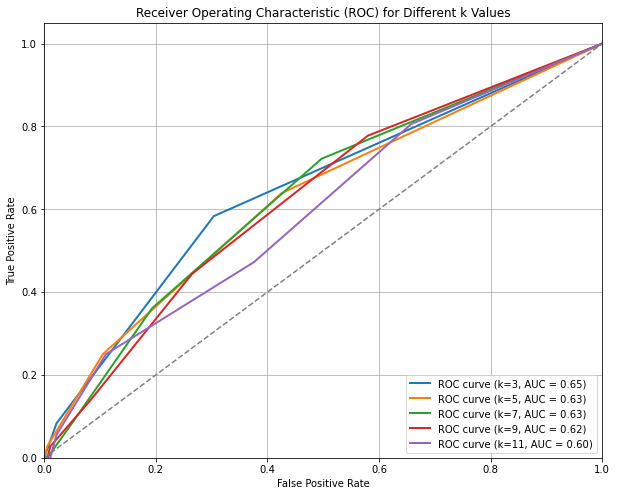

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset from Excel file
dataset_path = "us-violence-brief-1.xls" 
df = pd.read_excel(dataset_path)

# Separate features and target variable
X = df[['year', 'month', 'day', 'latitude', 'longitude']].values
y = df['fatalities'].values

# Define hyperparameters to tune
k_values = [3, 5, 7, 9, 11]
num_folds = 5

# Initialize lists to store ROC curve data
roc_data = {'fpr': [], 'tpr': [], 'auc': []}

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for k in k_values:
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Initialize lists to store predictions and true labels
    all_y_pred = []
    all_y_true = []
    
    for train_index, val_index in kf.split(X):
        # Split data into training and validation sets
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Filter training data for years 2020-2022
        X_train_2020_2022 = X_train[(X_train[:, 0] >= 2020) & (X_train[:, 0] <= 2022)]
        y_train_2020_2022 = y_train[(X_train[:, 0] >= 2020) & (X_train[:, 0] <= 2022)]

        # Filter validation data for year 2023
        X_val_2023 = X_val[X_val[:, 0] == 2023]
        y_val_2023 = y_val[X_val[:, 0] == 2023]

        # Train the classifier on the training data (2020-2022)
        knn.fit(X_train_2020_2022, y_train_2020_2022)

        # Predict probabilities on the validation set (2023)
        y_scores = knn.predict_proba(X_val_2023)[:, 1]  # Probability of class 1 (fatality)
        
        # Append predictions and true labels
        all_y_pred.extend(y_scores)
        all_y_true.extend(y_val_2023)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(all_y_true, all_y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Store ROC curve data
    roc_data['fpr'].append(fpr)
    roc_data['tpr'].append(tpr)
    roc_data['auc'].append(roc_auc)

# Plot ROC curves for all k values
plt.figure(figsize=(10, 8))
for i, k in enumerate(k_values):
    plt.plot(roc_data['fpr'][i], roc_data['tpr'][i], lw=2, label='ROC curve (k=%d, AUC = %0.2f)' % (k, roc_data['auc'][i]))

# Plotting settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Different k Values')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
